## PHYS 301 2022W2 Howework \#2: Python Notebook

In [3]:
import matplotlib.pyplot as plt
import numpy as np

### Problem \#6

#### Motion of a charge through a charged ring

Consider a charged ring of radius $R = 1$ m with charge $Q=-1\,{\rm \mu C}$.  Now consider a test particle with charge $Q=+1\,{\rm \mu C}$ and mass $m=100$ g, released from a point $x_0$ on the symmetry axis of the ring at time $t=0$. Compute the trajectory of the charge up to $t = 1000$ s for $x_0=1$ m and $x_0 = 10$ m.

In order to do this, we need to numerically integrate Newton's equation of motion ${\bf F} = m{\bf a}$. This is a second order ordinary differential equation. Without getting into the details about integrating ODEs, all of them are essentially based on a Taylor expansion in time for a small time time increment $\Delta t$. A suitable algorithm for this particular kind is the "velocity Verlet" method. Let us denote position, velocity and acceleration at time $t$ with $x(t)$, $v(t)$, and $a(t)$.  Then these quantities after a small time step $\Delta t$ can be obtained as follows:

$$v(t+\Delta t/2)=v(t)+ a(t)\Delta t/2$$
$$x(t+\Delta t)=x(t)+ v(t+\Delta t/2)\Delta t$$
$$v(t+\Delta t)=v(t+\Delta t/2)+ a(t+\Delta t)\Delta t/2$$

These equations are in a form that can be directly implemented in a computer program. First define all relevant constants and a function that returns the force or acceleration as a function of position $x(t)$, and initialize the position to $x[0] = x_0$ and the velocity to $v[0] = 0$. Then advance $x(t)$ and $v(t)$ according to the algorithm above and store the trajectory in an array. Your answer should consist of a plot of this trajectory (position versus time) for the two initial positions given above. Comment on the differences between these trajectories. Make sure you integrate long enough to see the characteristic pattern of the motion in each case.

Hints: By considering the symmetry of the problem, you should notice that the charge moves in one dimension only. You can try out different values of the timestep $\Delta t$ (what happens qualitatively), but a possible value for the parameters given above is $\Delta t = 1$ s.  Ignore gravity.

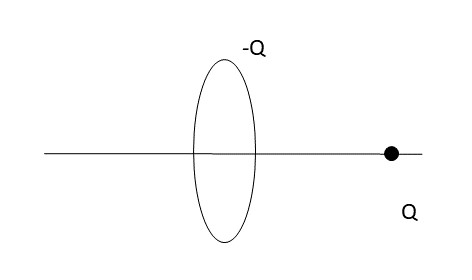

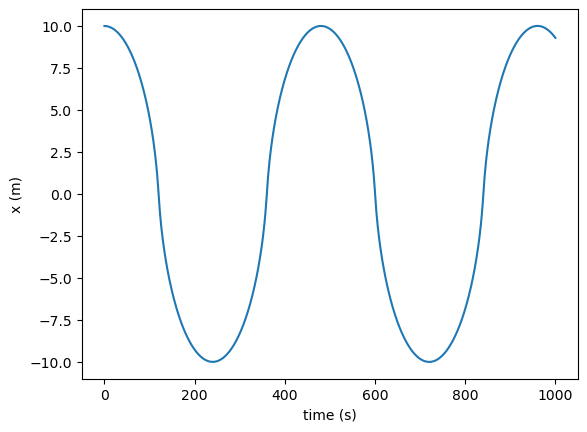

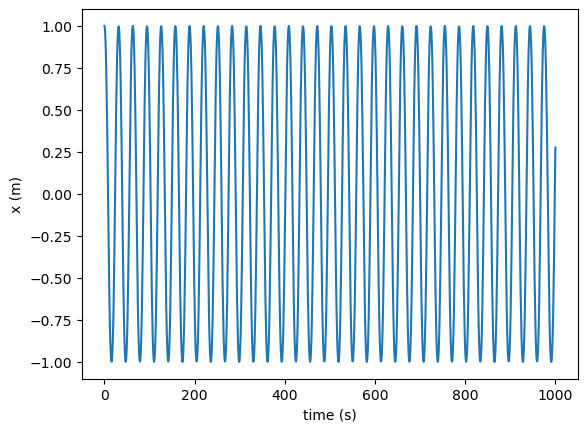

In [10]:
eps0 = 8.8541878128E-12
q = 1E-6
m = 0.1
omega2 = -q*q/(4*np.pi*eps0*m)

# define constants, dt is the time step in seconds
dt = 1.0
dt2 = dt/2.

# set up array for position and time
npts = 1001
x10 = np.zeros(npts)
x1 = np.zeros(npts)
t = dt*np.arange(npts)

# determine the acceleration from the displacement
# omega2 is a constant you should determine from the charge and mass
def a(x):
    return omega2*x/(1+x**2)**(1.5)

# set initial position and velocity
v10 = 0.0
v1 = 0.0
x10[0] = 10.0
x1[0] = 1.0
lastA10 = a(x10[0])
lastA1 = a(x1[0])

# v(t+ Dt/2)=  v(t)         + a(x(t)) Dt/2
# x(t+ Dt)=    x(t)         + v(t+ Dt/2) Dt
# v(t+ Dt)=    v(t+ Dt/2)   + a(x(t+ Dt)) Dt/2
def vdt2(vt, at):
    return vt + at*dt2
def xdt(xt, vt, at):
    return xt + vdt2(vt,at)*dt
def vdt(vt, at, atd): 
    return vdt2(vt,at) + atd*dt2

skipFirst = True
for i, x in enumerate(x10):
    if skipFirst:
        skipFirst = False
    else:
        thisX10 = x10[i-1]
        thisX1 = x1[i-1]
        x10[i] = xdt(thisX10, v10, lastA10)
        x1[i] = xdt(thisX1, v1, lastA1)
        nextA10 = a(x10[i])
        nextA1 = a(x1[i])
        v10 = vdt(v10, lastA10, nextA10)
        v1 = vdt(v1, lastA1, nextA1)
        lastA10 = nextA10
        lastA1 = nextA1

time = np.linspace(0,1000,1001)
plt.plot(time,x10)
plt.xlabel('time (s)')
plt.ylabel('x (m)')
plt.show()
plt.plot(time,x1)
plt.xlabel('time (s)')
plt.ylabel('x (m)')
plt.show()